# **RESULT ANALYSIS NOTEBOOK**
### Martí Cortada Garcia
---

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

def return_number_from_string(input_string):
    numbers = "".join([char for char in input_string if char.isdigit()])
    return numbers

def Fnorm(A, B):
    number_of_matrices = len(A)
    Fnorm = 0
    for a, b in zip(A.items(),B.items()):
        Fnorm += np.linalg.norm((a[1]-b[1]), 'fro')
    return Fnorm/number_of_matrices

def Fnorm_a_dif_b(A, B):
    Fnorm = 0
    intFnorm = 0
    for a, b in zip(A.items(),B.items()):
        if a[0] == "M_0_to_1":
            intFnorm += np.linalg.norm((a[1]-b[1]), 'fro')
        else:
            Fnorm += np.linalg.norm((a[1]-b[1]), 'fro')
    return Fnorm/4, intFnorm

def difFnorm(A, B):
    Fnorma = 0
    Fnormb = 0
    for a, b in zip(A.items(),B.items()):
        if a[0] == "M_0_t0_2" or a[0] == "M_1_to_4":
            Fnormb += np.linalg.norm((a[1]-b[1]), 'fro')
        else:
            Fnorma += np.linalg.norm((a[1]-b[1]), 'fro')
    return Fnorma/3, Fnormb/2

def get_abs_difference_of_a_given_matrix_position(A, B, i, j):
    number_of_matrices = len(A)
    abs_diff = 0
    for a, b in zip(A.items(),B.items()):
        abs_diff += np.abs(a[1][i][j] - b[1][i][j])
    return abs_diff/number_of_matrices

def get_vector_branch_lengths(A, bl_a, bl_b):
    branch_lengths = []
    iter = 0
    for a in A.items():
        bl = float(a[1])
        if iter == 0 or iter == 3:
            branch_lengths.append(np.abs(bl - bl_b))
        else:
            branch_lengths.append(np.abs(bl - bl_a))
        iter += 1
    return branch_lengths



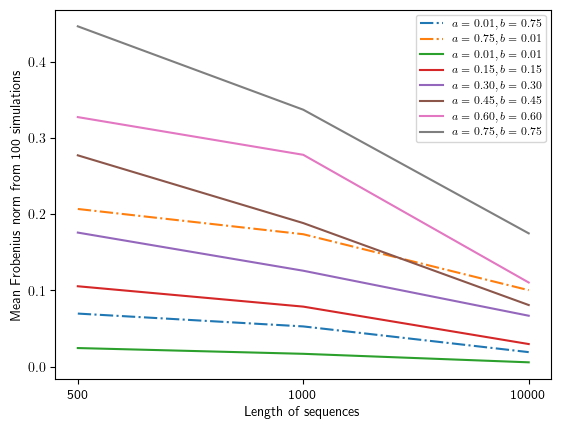

In [13]:
# Load the data
directory = "./OUTPUTS/" 

# Parameters to be compared, which will have 3 positions, concerning its length: [(l=500), (l=1000), (l=10000)]
a1_b75 = np.zeros(3)
a75_b1 = np.zeros(3)
a1_b1 = np.zeros(3)
a15_b15 = np.zeros(3)
a30_b30 = np.zeros(3)
a45_b45 = np.zeros(3)
a60_b60 = np.zeros(3)
a75_b75 = np.zeros(3)

a1_b1_fnorm = np.zeros(3)
a1_b1_fnorm_int = np.zeros(3)
a15_b15_fnorm = np.zeros(3)
a15_b15_fnorm_int = np.zeros(3)
a30_b30_fnorm = np.zeros(3)
a30_b30_fnorm_int = np.zeros(3)
a45_b45_fnorm = np.zeros(3)
a45_b45_fnorm_int = np.zeros(3)
a60_b60_fnorm = np.zeros(3)
a60_b60_fnorm_int = np.zeros(3)
a75_b75_fnorm = np.zeros(3)
a75_b75_fnorm_int = np.zeros(3)

a1_b75_fnorm = np.zeros(3)
a1_b75_fnorm_int = np.zeros(3)
a75_b1_fnorm = np.zeros(3)
a75_b1_fnorm_int = np.zeros(3)

# The last number indicates the idx_i and idx_j of the matrix (i.e. 11 means i=1, j=1)
# a1_b75_11 = np.zeros(3)
# a75_b1_11 = np.zeros(3)
# a1_b1_11 = np.zeros(3)
# a15_b15_11 = np.zeros(3)
# a30_b30_11 = np.zeros(3)
# a45_b45_11 = np.zeros(3)
# a60_b60_11 = np.zeros(3)
# a75_b75_11 = np.zeros(3)

# Branch lengths
bl500 = dict()
bl1000 = dict()
bl10000 = dict()
bl500["a_0.01_b_0.75"] = [0,0,0,0,0]; bl1000["a_0.01_b_0.75"] = [0,0,0,0,0]; bl10000["a_0.01_b_0.75"] = [0,0,0,0,0];
bl500["a_0.75_b_0.01"] = [0,0,0,0,0]; bl1000["a_0.75_b_0.01"] = [0,0,0,0,0]; bl10000["a_0.75_b_0.01"] = [0,0,0,0,0];
bl500["a_0.01_b_0.01"] = [0,0,0,0,0]; bl1000["a_0.01_b_0.01"] = [0,0,0,0,0]; bl10000["a_0.01_b_0.01"] = [0,0,0,0,0];
bl500["a_0.15_b_0.15"] = [0,0,0,0,0]; bl1000["a_0.15_b_0.15"] = [0,0,0,0,0]; bl10000["a_0.15_b_0.15"] = [0,0,0,0,0];
bl500["a_0.30_b_0.30"] = [0,0,0,0,0]; bl1000["a_0.30_b_0.30"] = [0,0,0,0,0]; bl10000["a_0.30_b_0.30"] = [0,0,0,0,0];
bl500["a_0.45_b_0.45"] = [0,0,0,0,0]; bl1000["a_0.45_b_0.45"] = [0,0,0,0,0]; bl10000["a_0.45_b_0.45"] = [0,0,0,0,0];
bl500["a_0.60_b_0.60"] = [0,0,0,0,0]; bl1000["a_0.60_b_0.60"] = [0,0,0,0,0]; bl10000["a_0.60_b_0.60"] = [0,0,0,0,0];
bl500["a_0.75_b_0.75"] = [0,0,0,0,0]; bl1000["a_0.75_b_0.75"] = [0,0,0,0,0]; bl10000["a_0.75_b_0.75"] = [0,0,0,0,0];

# Iterate over all files in the directory that are related with RANDOM EM initialisation
for filename in os.listdir(directory):
    if filename.endswith("random") and filename != ".DS_Store":
        bl_a = return_number_from_string(filename.split("_")[1])
        bl_b = return_number_from_string(filename.split("_")[2])
        length = filename.split("_")[3]
        real_root_distr = np.load(directory + filename + "/real_root_distr.npy", allow_pickle=True)
        real_matrices = np.load(directory + filename + "/real_matrices.npy", allow_pickle=True).item()
        for dir_name in os.listdir(directory+filename+"/RESULTS/"):
            if dir_name != ".DS_Store":
                res_dir = directory+filename+"/RESULTS/"+dir_name+"/"
                M_estimation = np.load(res_dir+"M_estimation.npy", allow_pickle=True).item()
                estimated_branch_lengths = np.load(res_dir+"estimated_branch_lengths.npy", allow_pickle=True).item()
                root_estimation = np.load(res_dir+"root_estimation.npy", allow_pickle=True)
                Niter = open(res_dir+"Niter.txt", "r").read()
                TExec = open(res_dir+"TExec.txt", "r").read()
                if bl_a == "1" and bl_b == "75":
                    if length == "500":
                        a1_b75[0] += Fnorm(M_estimation, real_matrices)
                        a1_b75_fnorm[0] += difFnorm(M_estimation, real_matrices)[0]
                        a1_b75_fnorm_int[0] += difFnorm(M_estimation, real_matrices)[1]
                        # a1_b75_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.01_b_0.75"] += get_vector_branch_lengths(estimated_branch_lengths, 0.01, 0.75)
                    elif length == "1000":
                        a1_b75[1] += Fnorm(M_estimation, real_matrices)
                        a1_b75_fnorm[1] += difFnorm(M_estimation, real_matrices)[0]
                        a1_b75_fnorm_int[1] += difFnorm(M_estimation, real_matrices)[1]
                        # a1_b75_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.01_b_0.75"] += get_vector_branch_lengths(estimated_branch_lengths, 0.01, 0.75)
                    elif length == "10000":
                        a1_b75[2] += Fnorm(M_estimation, real_matrices)
                        a1_b75_fnorm[2] += difFnorm(M_estimation, real_matrices)[0]
                        a1_b75_fnorm_int[2] += difFnorm(M_estimation, real_matrices)[1]
                        # a1_b75_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.01_b_0.75"] += get_vector_branch_lengths(estimated_branch_lengths, 0.01, 0.75)
                if bl_a == "75" and bl_b == "1":
                    if length == "500":
                        a75_b1[0] += Fnorm(M_estimation, real_matrices)
                        a75_b1_fnorm[0] += difFnorm(M_estimation, real_matrices)[0]
                        a75_b1_fnorm_int[0] += difFnorm(M_estimation, real_matrices)[1]
                        # a75_b1_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.75_b_0.01"] += get_vector_branch_lengths(estimated_branch_lengths, 0.75, 0.01)
                    elif length == "1000":
                        a75_b1[1] += Fnorm(M_estimation, real_matrices)
                        a75_b1_fnorm[1] += difFnorm(M_estimation, real_matrices)[0]
                        a75_b1_fnorm_int[1] += difFnorm(M_estimation, real_matrices)[1]
                        # a75_b1_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.75_b_0.01"] += get_vector_branch_lengths(estimated_branch_lengths, 0.75, 0.01)                       
                    elif length == "10000":
                        a75_b1[2] += Fnorm(M_estimation, real_matrices)
                        a75_b1_fnorm[2] += difFnorm(M_estimation, real_matrices)[0]
                        a75_b1_fnorm_int[2] += difFnorm(M_estimation, real_matrices)[1]
                        # a75_b1_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.75_b_0.01"] += get_vector_branch_lengths(estimated_branch_lengths, 0.75, 0.01)
                elif bl_a == "1" and bl_b == "1":
                    if length == "500":
                        a1_b1[0] += Fnorm(M_estimation, real_matrices)
                        a1_b1_fnorm[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a1_b1_fnorm_int[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a1_b1_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.01_b_0.01"] += get_vector_branch_lengths(estimated_branch_lengths, 0.01, 0.01)
                    elif length == "1000":
                        a1_b1[1] += Fnorm(M_estimation, real_matrices)
                        a1_b1_fnorm[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a1_b1_fnorm_int[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a1_b1_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.01_b_0.01"] += get_vector_branch_lengths(estimated_branch_lengths, 0.01, 0.01)
                    elif length == "10000":
                        a1_b1[2] += Fnorm(M_estimation, real_matrices)
                        a1_b1_fnorm[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a1_b1_fnorm_int[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a1_b1_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.01_b_0.01"] += get_vector_branch_lengths(estimated_branch_lengths, 0.01, 0.01)
                elif bl_a == "15" and bl_b == "15":
                    if length == "500":
                        a15_b15[0] += Fnorm(M_estimation, real_matrices)
                        a15_b15_fnorm[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a15_b15_fnorm_int[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a15_b15_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.15_b_0.15"] += get_vector_branch_lengths(estimated_branch_lengths, 0.15, 0.15)
                    elif length == "1000":
                        a15_b15[1] += Fnorm(M_estimation, real_matrices)
                        a15_b15_fnorm[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a15_b15_fnorm_int[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a15_b15_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.15_b_0.15"] += get_vector_branch_lengths(estimated_branch_lengths, 0.15, 0.15)
                    elif length == "10000":
                        a15_b15[2] += Fnorm(M_estimation, real_matrices)
                        a15_b15_fnorm[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a15_b15_fnorm_int[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a15_b15_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.15_b_0.15"] += get_vector_branch_lengths(estimated_branch_lengths, 0.15, 0.15)
                elif bl_a == "30" and bl_b == "30":
                    if length == "500":
                        a30_b30[0] += Fnorm(M_estimation, real_matrices)
                        a30_b30_fnorm[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a30_b30_fnorm_int[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a30_b30_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.30_b_0.30"] += get_vector_branch_lengths(estimated_branch_lengths, 0.30, 0.30)
                    elif length == "1000":
                        a30_b30[1] += Fnorm(M_estimation, real_matrices)
                        a30_b30_fnorm[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a30_b30_fnorm_int[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a30_b30_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.30_b_0.30"] += get_vector_branch_lengths(estimated_branch_lengths, 0.30, 0.30)
                    elif length == "10000":
                        a30_b30[2] += Fnorm(M_estimation, real_matrices)
                        a30_b30_fnorm[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a30_b30_fnorm_int[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a30_b30_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.30_b_0.30"] += get_vector_branch_lengths(estimated_branch_lengths, 0.30, 0.30)
                elif bl_a == "45" and bl_b == "45":
                    if length == "500":
                        a45_b45[0] += Fnorm(M_estimation, real_matrices)
                        a45_b45_fnorm[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a45_b45_fnorm_int[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a45_b45_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.45_b_0.45"] += get_vector_branch_lengths(estimated_branch_lengths, 0.45, 0.45)
                    elif length == "1000":
                        a45_b45[1] += Fnorm(M_estimation, real_matrices)
                        a45_b45_fnorm[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a45_b45_fnorm_int[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a45_b45_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.45_b_0.45"] += get_vector_branch_lengths(estimated_branch_lengths, 0.45, 0.45)
                    elif length == "10000":
                        a45_b45[2] += Fnorm(M_estimation, real_matrices)
                        a45_b45_fnorm[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a45_b45_fnorm_int[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a45_b45_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.45_b_0.45"] += get_vector_branch_lengths(estimated_branch_lengths, 0.45, 0.45)
                elif bl_a == "60" and bl_b == "60":
                    if length == "500":
                        a60_b60[0] += Fnorm(M_estimation, real_matrices)
                        a60_b60_fnorm[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a60_b60_fnorm_int[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a60_b60_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.60_b_0.60"] += get_vector_branch_lengths(estimated_branch_lengths, 0.60, 0.60)
                    elif length == "1000":
                        a60_b60[1] += Fnorm(M_estimation, real_matrices)
                        a60_b60_fnorm[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a60_b60_fnorm_int[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a60_b60_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.60_b_0.60"] += get_vector_branch_lengths(estimated_branch_lengths, 0.60, 0.60)
                    elif length == "10000":
                        a60_b60[2] += Fnorm(M_estimation, real_matrices)
                        a60_b60_fnorm[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a60_b60_fnorm_int[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a60_b60_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.60_b_0.60"] += get_vector_branch_lengths(estimated_branch_lengths, 0.60, 0.60)
                elif bl_a == "75" and bl_b == "75":
                    if length == "500":
                        a75_b75[0] += Fnorm(M_estimation, real_matrices)
                        a75_b75_fnorm[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a75_b75_fnorm_int[0] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a75_b75_11[0] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl500["a_0.75_b_0.75"] += get_vector_branch_lengths(estimated_branch_lengths, 0.75, 0.75)
                    elif length == "1000":
                        a75_b75[1] += Fnorm(M_estimation, real_matrices)
                        a75_b75_fnorm[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a75_b75_fnorm_int[1] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a75_b75_11[1] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl1000["a_0.75_b_0.75"] += get_vector_branch_lengths(estimated_branch_lengths, 0.75, 0.75)
                    elif length == "10000":
                        a75_b75[2] += Fnorm(M_estimation, real_matrices)
                        a75_b75_fnorm[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[0]
                        a75_b75_fnorm_int[2] += Fnorm_a_dif_b(M_estimation, real_matrices)[1]
                        # a75_b75_11[2] = get_abs_difference_of_a_given_matrix_position(M_estimation, real_matrices, 1, 1)
                        bl10000["a_0.75_b_0.75"] += get_vector_branch_lengths(estimated_branch_lengths, 0.75, 0.75)


x = [500, 1000, 10000]
xi = list(range(len(x)))
plt.plot(xi, a1_b75/100, label = r"$a=0.01,b=0.75$", linestyle="-.")
plt.plot(xi, a75_b1/100, label = r"$a=0.75,b=0.01$", linestyle="-.")
plt.plot(xi, a1_b1/100, label = r"$a=0.01,b=0.01$", linestyle="-")
plt.plot(xi, a15_b15/100, label = r"$a=0.15,b=0.15$", linestyle="-")
plt.plot(xi, a30_b30/100, label = r"$a=0.30,b=0.30$", linestyle="-")
plt.plot(xi, a45_b45/100, label = r"$a=0.45,b=0.45$", linestyle="-")
plt.plot(xi, a60_b60/100, label = r"$a=0.60,b=0.60$", linestyle="-")
plt.plot(xi, a75_b75/100, label = r"$a=0.75,b=0.75$", linestyle="-")
plt.legend(fontsize="8")
plt.xticks(xi, x)
plt.xlabel("Length of sequences")
plt.ylabel("Mean Frobenius norm from 100 simulations") 
plt.show()

In [158]:
# plt.plot(xi, a1_b75_11, label = "a=1,b=75", linestyle="-.")
# plt.plot(xi, a75_b1_11, label = "a=75,b=1", linestyle="-.")
# plt.plot(xi, a1_b1_11, label = "a=1,b=1", linestyle="-")
# plt.plot(xi, a15_b15_11, label = "a=15,b=15", linestyle="-")
# plt.plot(xi, a30_b30_11, label = "a=30,b=30", linestyle="-")
# plt.plot(xi, a45_b45_11, label = "a=45,b=45", linestyle="-")
# plt.plot(xi, a60_b60_11, label = "a=60,b=60", linestyle="-")
# plt.plot(xi, a75_b75_11, label = "a=75,b=75", linestyle="-")
# plt.legend()
# plt.xticks(xi, x)
# plt.xlabel("Length of sequences")
# plt.ylabel("Absolute difference of M[1][1] elem.") 
# plt.show()

(0.01, 0.01, 0.15, 0.3, 0.45, 0.6, 0.75, 0.75)
(0.75, 0.01, 0.15, 0.3, 0.45, 0.6, 0.01, 0.75)


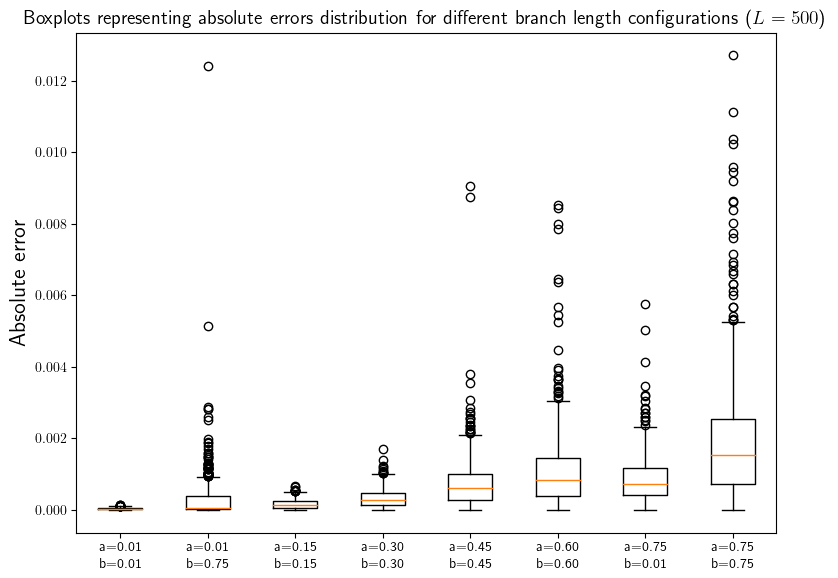

In [18]:
plt.rcParams['text.usetex'] = True
labelsA = []
labelsB = []
data = []
for i in bl500.items():
    labelsA.append(float(i[0].split("_")[1]))
    labelsB.append(float(i[0].split("_")[3]))
    data.append(np.array(i[1])/100)

# Zip the arrays together
zipped = zip(labelsA, labelsB, data)

# Sort the zipped list based on the values of the first array
sorted_zip = sorted(zipped, key=lambda x: x[0])

# Unzip the sorted list to obtain the sorted arrays
labA, labB, arr_data = zip(*sorted_zip)

print(labA)
print(labB)
arr_data = list(arr_data)
arr_data[0], arr_data[1] = arr_data[1], arr_data[0]

fig = plt.figure(figsize =(7, 5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(arr_data)
ax.set_ylabel(r'Absolute error', fontsize=16)
ax.set_title(r'Boxplots representing absolute errors distribution for different branch length configurations ($L=500$)', fontsize=14)
ax.set_xticklabels([r'a=0.01\par b=0.01', r'a=0.01\par b=0.75', r'a=0.15\par b=0.15', r'a=0.30\par b=0.30', r'a=0.45\par b=0.45', r'a=0.60\par b=0.60', r'a=0.75\par b=0.01', r'a=0.75\par b=0.75'])
# show plot
plt.show()

(0.01, 0.01, 0.15, 0.3, 0.45, 0.6, 0.75, 0.75)
(0.75, 0.01, 0.15, 0.3, 0.45, 0.6, 0.01, 0.75)


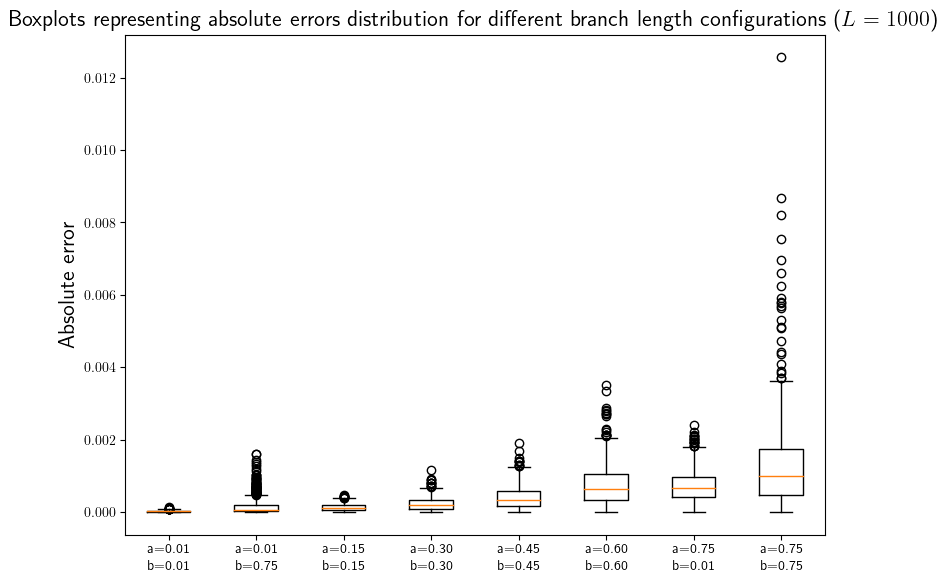

In [19]:
plt.rcParams['text.usetex'] = True
labelsA = []
labelsB = []
data = []
for i in bl1000.items():
    labelsA.append(float(i[0].split("_")[1]))
    labelsB.append(float(i[0].split("_")[3]))
    data.append(np.array(i[1])/100)

# Zip the arrays together
zipped = zip(labelsA, labelsB, data)

# Sort the zipped list based on the values of the first array
sorted_zip = sorted(zipped, key=lambda x: x[0])

# Unzip the sorted list to obtain the sorted arrays
labA, labB, arr_data = zip(*sorted_zip)

print(labA)
print(labB)
arr_data = list(arr_data)
arr_data[0], arr_data[1] = arr_data[1], arr_data[0]

fig = plt.figure(figsize =(7, 5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(arr_data)
ax.set_ylabel(r'Absolute error', fontsize=16)
ax.set_title(r'Boxplots representing absolute errors distribution for different branch length configurations ($L=1000$)', fontsize=16)
ax.set_xticklabels([r'a=0.01\par b=0.01', r'a=0.01\par b=0.75', r'a=0.15\par b=0.15', r'a=0.30\par b=0.30', r'a=0.45\par b=0.45', r'a=0.60\par b=0.60', r'a=0.75\par b=0.01', r'a=0.75\par b=0.75'])
# show plot
plt.show()

(0.01, 0.01, 0.15, 0.3, 0.45, 0.6, 0.75, 0.75)
(0.75, 0.01, 0.15, 0.3, 0.45, 0.6, 0.01, 0.75)


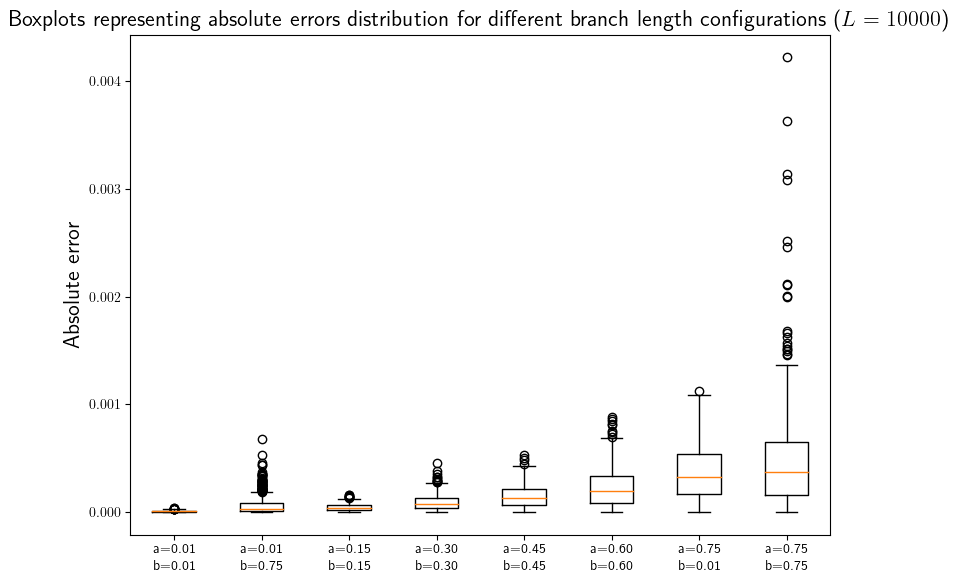

In [20]:
plt.rcParams['text.usetex'] = True
labelsA = []
labelsB = []
data = []
for i in bl10000.items():
    labelsA.append(float(i[0].split("_")[1]))
    labelsB.append(float(i[0].split("_")[3]))
    data.append(np.array(i[1])/100)

# Zip the arrays together
zipped = zip(labelsA, labelsB, data)

# Sort the zipped list based on the values of the first array
sorted_zip = sorted(zipped, key=lambda x: x[0])

# Unzip the sorted list to obtain the sorted arrays
labA, labB, arr_data = zip(*sorted_zip)

print(labA)
print(labB)
arr_data = list(arr_data)
arr_data[0], arr_data[1] = arr_data[1], arr_data[0]

fig = plt.figure(figsize =(7, 5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(arr_data)
ax.set_ylabel(r'Absolute error', fontsize=16)
ax.set_title(r'Boxplots representing absolute errors distribution for different branch length configurations ($L=10000$)', fontsize=16)
ax.set_xticklabels([r'a=0.01\par b=0.01', r'a=0.01\par b=0.75', r'a=0.15\par b=0.15', r'a=0.30\par b=0.30', r'a=0.45\par b=0.45', r'a=0.60\par b=0.60', r'a=0.75\par b=0.01', r'a=0.75\par b=0.75'])
# show plot
plt.show()

[ -25249.52155538  -51295.00820965 -510418.57862374]
[ -25086.42566045  -51393.16634574 -510694.65151607]


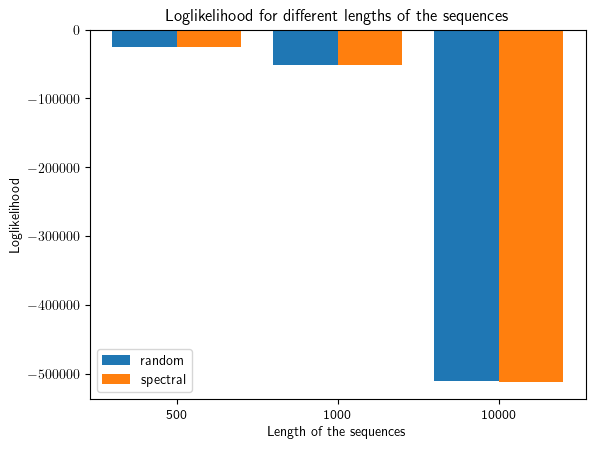

In [21]:
lik_random = np.zeros(3)
Texec_random = np.zeros(3)
lik_spectral = np.zeros(3)
Texec_spectral = np.zeros(3)

# Iterate over all files in the directory that are related with RANDOM EM initialisation
for filename in os.listdir(directory):
    if filename.endswith("10") and filename != ".DS_Store":
        bl = 0.10
        length = filename.split("_")[4]
        for dir_name in os.listdir(directory+filename+"/RESULTS/"):
            if dir_name != ".DS_Store":
                res_dir = directory+filename+"/RESULTS/"+dir_name+"/"
                Niter = open(res_dir+"Niter.txt", "r").read()
                TExec = open(res_dir+"TExec.txt", "r").read()
                loglik = np.load(res_dir+"loglikelihood.npy", allow_pickle=True)
                if filename.startswith("RANDOM"):
                    if length == "500":
                        lik_random[0] += loglik[-1]
                        Texec_random[0] += float(TExec)
                    elif length == "1000":
                        lik_random[1] += loglik[-1]
                        Texec_random[1] += float(TExec)
                    elif length == "10000":
                        lik_random[2] += loglik[-1]
                        Texec_random[2] += float(TExec)
                elif filename.startswith("SPECTRAL"):   
                    if length == "500":
                        lik_spectral[0] += loglik[-1]
                        Texec_spectral[0] += float(TExec)
                    elif length == "1000":
                        lik_spectral[1]+= loglik[-1]
                        Texec_spectral[1] += float(TExec)
                    elif length == "10000":
                        lik_spectral[2] += loglik[-1]
                        Texec_spectral[2] += float(TExec)

print(lik_random/100)
print(lik_spectral/100)

X = ["500", "1000", "10000"]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, lik_random/100, 0.4, label = 'random')
plt.bar(X_axis + 0.2, lik_spectral/100, 0.4, label = 'spectral')
  
plt.xticks(X_axis, X)
plt.xlabel("Length of the sequences")
plt.ylabel("Loglikelihood")
plt.title("Loglikelihood for different lengths of the sequences")
plt.legend()
plt.show()


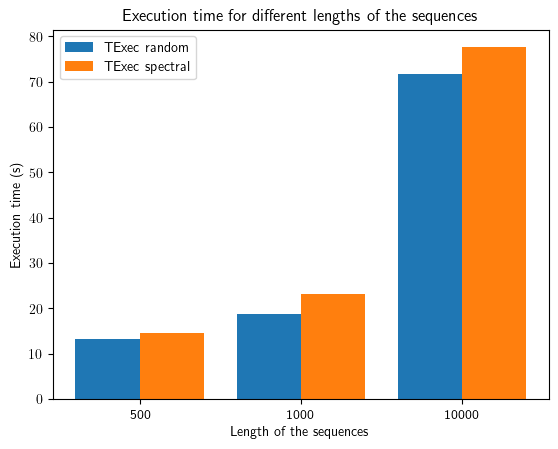

In [22]:
X = ["500", "1000", "10000"]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Texec_random/100, 0.4, label = 'TExec random')
plt.bar(X_axis + 0.2, Texec_spectral/100, 0.4, label = 'TExec spectral')
  
plt.xticks(X_axis, X)
plt.xlabel("Length of the sequences")
plt.ylabel("Execution time (s)")
plt.title("Execution time for different lengths of the sequences")
plt.legend()
plt.show()

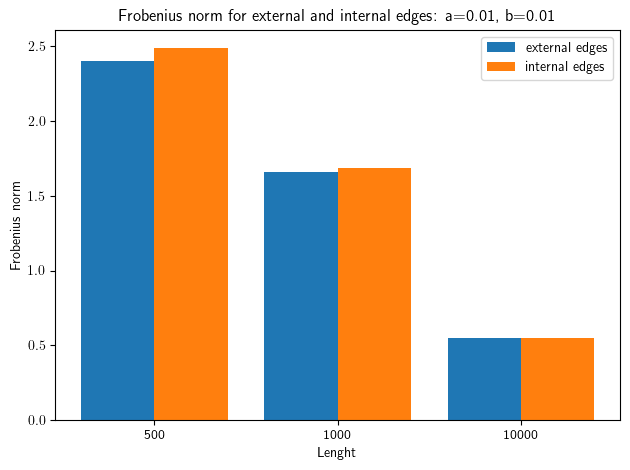

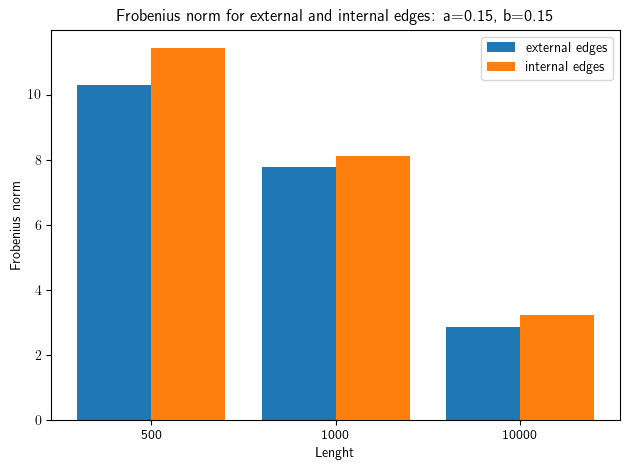

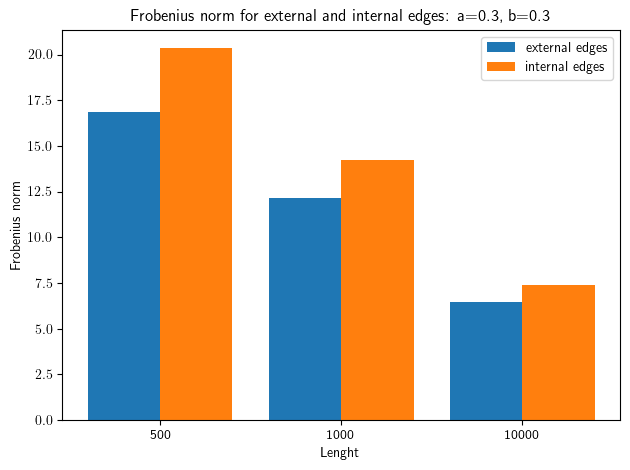

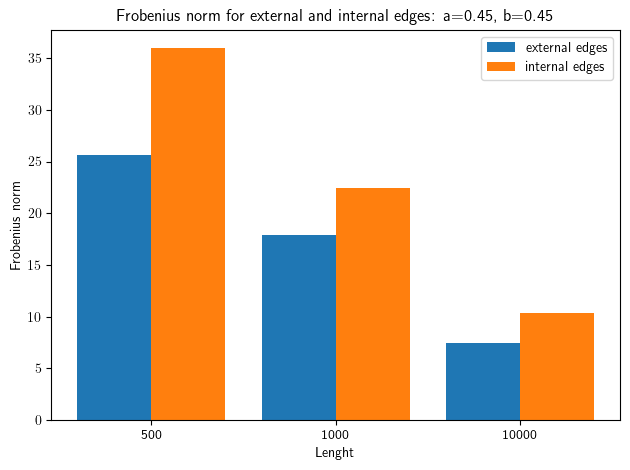

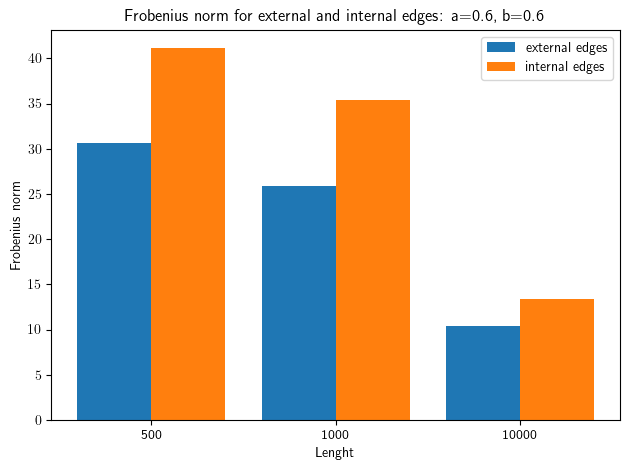

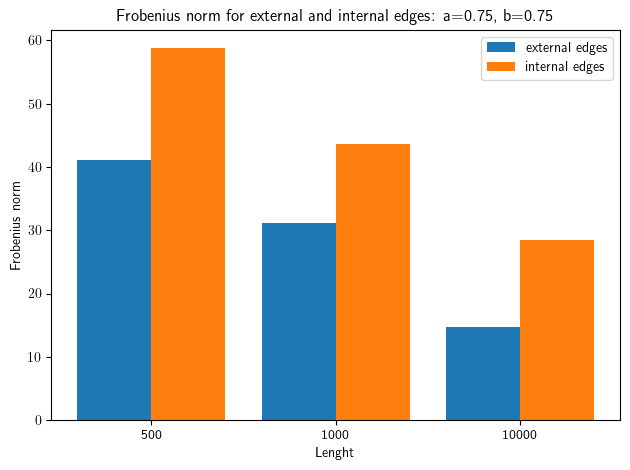

In [23]:
# Define the vectors
vectors = np.array([
    a1_b1_fnorm,
    a1_b1_fnorm_int,
    a15_b15_fnorm,
    a15_b15_fnorm_int,
    a30_b30_fnorm,
    a30_b30_fnorm_int,
    a45_b45_fnorm,
    a45_b45_fnorm_int,
    a60_b60_fnorm,
    a60_b60_fnorm_int,
    a75_b75_fnorm,
    a75_b75_fnorm_int
])

# Create bar chart
X = ["500", "1000", "10000"]
X_axis = np.arange(len(X))
bar_width = 0.4
opacity = 0.8

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
a = [500, 1000, 10000]
aa = [0.01, 0.01, 0.15, 0.15, 0.30, 0.30, 0.45, 0.45, 0.60, 0.60, 0.75, 0.75]

for i in [0,2,4,6,8,10]:
    plt.bar(X_axis - 0.2, vectors[i], 0.4, label = 'external edges')
    plt.bar(X_axis + 0.2, vectors[i+1], 0.4, label = 'internal edges')

    plt.xlabel('Lenght')
    plt.ylabel('Frobenius norm')
    plt.title(f'Frobenius norm for external and internal edges: a={aa[i]}, b={aa[i+1]}')
    plt.xticks(X_axis, X)
    plt.legend()

    plt.tight_layout()
    plt.show()


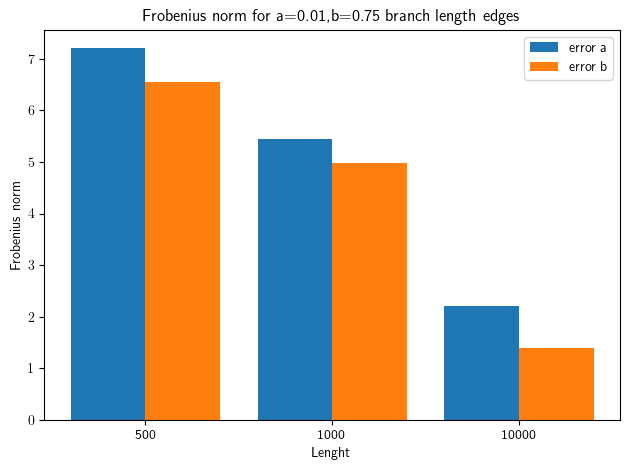

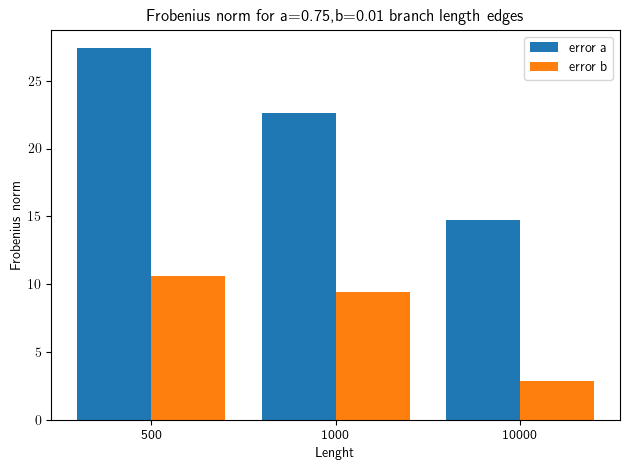

In [24]:
# Define the vectors
vectors = np.array([
    a1_b75_fnorm,
    a1_b75_fnorm_int,
    a75_b1_fnorm,
    a75_b1_fnorm_int,
])

# Create bar chart
X = ["500", "1000", "10000"]
X_axis = np.arange(len(X))
bar_width = 0.4
opacity = 0.8

aa = [0.01, 0.75, 0.75, 0.01]

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
a = [500, 1000, 10000]
for i in [0,2]:
    plt.bar(X_axis - 0.2, vectors[i], 0.4, label = 'error a')
    plt.bar(X_axis + 0.2, vectors[i+1], 0.4, label = 'error b')

    plt.xlabel('Lenght')
    plt.ylabel('Frobenius norm')
    plt.title(f'Frobenius norm for a={aa[i]},b={aa[i+1]} branch length edges')
    plt.xticks(X_axis, X)
    plt.legend()

    plt.tight_layout()
    plt.show()


## ROOT? 
Fer un apartat a les conclusions amb "future research lines" explicant el tema de les permutacions...